In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from qiskit.providers.ibmq import least_busy

/Users/ymarathe/anaconda/lib/python3.6/site-packages/scipy/__init__.py:144: UserWarning: Numpy 1.13.3 or above is required for this version of scipy (detected version 1.13.1)
  UserWarning)


In [2]:
'''
Quantum circuit to search for state 1010
'''
n_qubits = 4
num_qubits_reqd = 7

reflect_about_s = QuantumCircuit(num_qubits_reqd)
reflect_about_s.x(1)
reflect_about_s.x(3)
reflect_about_s.toffoli(0, 2, 5)
reflect_about_s.toffoli(1, 3, 4)
reflect_about_s.toffoli(4, 5, 6)
reflect_about_s.toffoli(1, 3, 4)
reflect_about_s.toffoli(0, 2, 5)
reflect_about_s.x(3)
reflect_about_s.x(1)

reflect_about_e = QuantumCircuit(num_qubits_reqd)
reflect_about_e.h(range(n_qubits))
reflect_about_e.x(range(n_qubits))
reflect_about_e.toffoli(1, 3, 4)
reflect_about_e.toffoli(0, 2, 5)
reflect_about_e.toffoli(4, 5, 6)
reflect_about_e.toffoli(0, 2, 5)
reflect_about_e.toffoli(1, 3, 4)
reflect_about_e.x(range(n_qubits))
reflect_about_e.h(range(n_qubits))

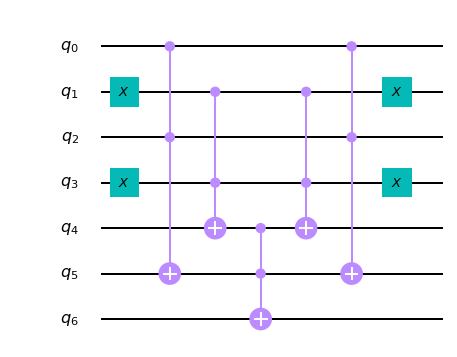

In [3]:
reflect_about_s.draw(output='mpl')

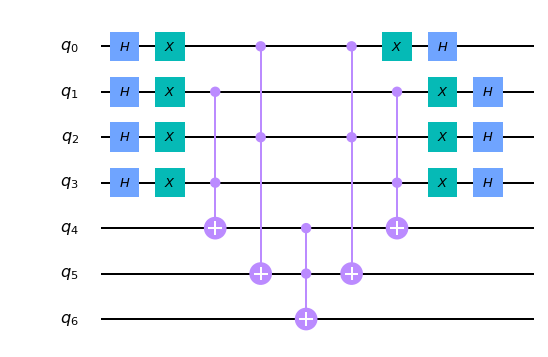

In [4]:
reflect_about_e.draw(output='mpl')

In [5]:
import numpy as np
num_rotations = round(np.pi * np.sqrt(2 ** n_qubits)/4)

grover_circuit = QuantumCircuit(num_qubits_reqd, n_qubits)
grover_circuit.h(range(n_qubits))
grover_circuit.x(num_qubits_reqd - 1)
grover_circuit.h(num_qubits_reqd - 1)

for i in range(int(num_rotations)):
    grover_circuit += reflect_about_s
    grover_circuit += reflect_about_e
    
grover_circuit.measure(range(n_qubits), range(n_qubits))

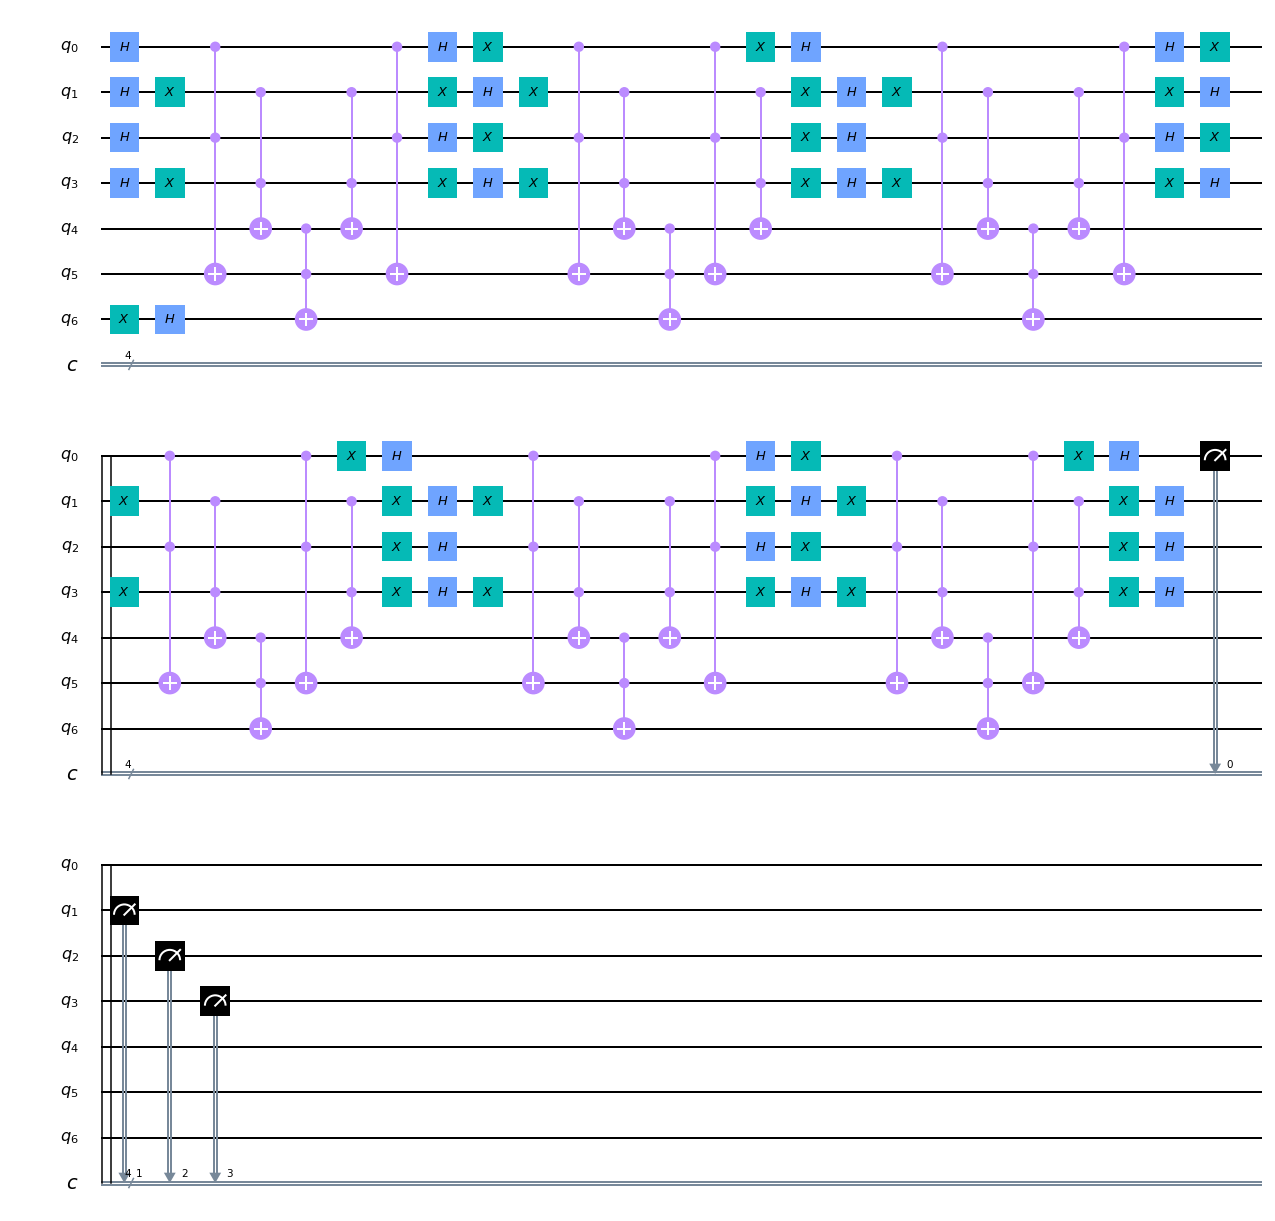

In [6]:
grover_circuit.draw(output='mpl')

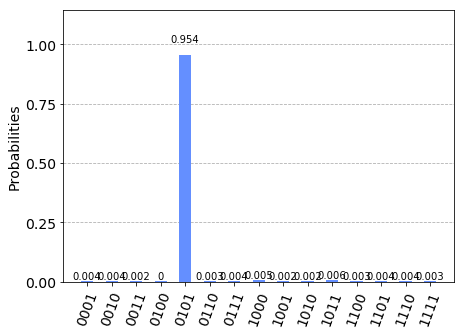

In [15]:
import math
from qiskit.test.mock import FakeMelbourne

backend = FakeMelbourne()     # mimics the melbourne device in terms of coupling map and basis gates
backend.properties = {}  

optimized_3 = transpile(grover_circuit, backend=backend, seed_transpiler=11, optimization_level=3)
print('gates = ', optimized_3.count_ops())
print('depth = ', optimized_3.depth())


job = execute(optimized_3, backend= Aer.get_backend('qasm_simulator'), shots=1024)
plot_histogram(job.result().get_counts())

/Users/ymarathe/anaconda/lib/python3.6/site-packages/qiskit/providers/models/backendconfiguration.py:337: UserWarning: `dt` and `dtm` now have units of seconds(s) rather than nanoseconds(ns).
  warnings.warn('`dt` and `dtm` now have units of seconds(s) rather '


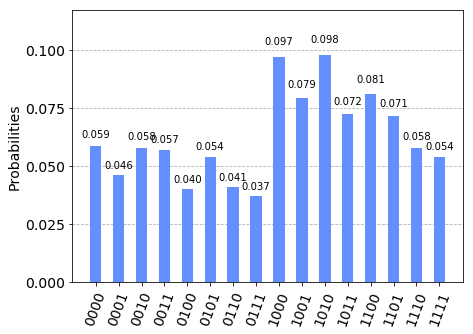

In [10]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub= 'ibm-q')
backend = least_busy(provider.backends(filters = lambda b: b.configuration().n_qubits >= num_qubits_reqd and not b.configuration().simulator and b.status().operational == True)
                    )
job = execute(optimized_3, backend=backend, shots=1024)
plot_histogram(job.result().get_counts())

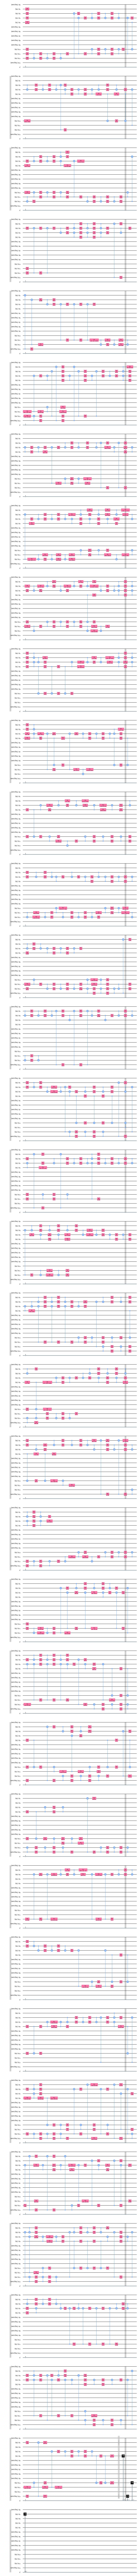

In [11]:
optimized_3.draw(output='mpl')